In [1]:
import os
import katdal
import katpoint
%pylab inline
import scape

import string
import time
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.WARNING)

Populating the interactive namespace from numpy and matplotlib


In [2]:
name = '1659865364' #'1607433065'  # e.g 1583650035
file_=str('http://archive-gw-1.kat.ac.za:7480/'+name+'/'+name+'_sdp_l0.full.rdb')
rdb = katdal.open(file_)
#print(rdb)

In [16]:
rdb.ants


[<katpoint.Antenna 'm000' diam=13.5m at 0x7f8e4f012278>,
 <katpoint.Antenna 'm001' diam=13.5m at 0x7f8e4f012358>,
 <katpoint.Antenna 'm002' diam=13.5m at 0x7f8e4f0976d8>,
 <katpoint.Antenna 'm003' diam=13.5m at 0x7f8e4f08a940>,
 <katpoint.Antenna 'm004' diam=13.5m at 0x7f8e4f0ea518>,
 <katpoint.Antenna 'm005' diam=13.5m at 0x7f8e4f057588>,
 <katpoint.Antenna 'm006' diam=13.5m at 0x7f8e4f11fef0>,
 <katpoint.Antenna 'm007' diam=13.5m at 0x7f8e4f037630>,
 <katpoint.Antenna 'm009' diam=13.5m at 0x7f8e4ec74d68>,
 <katpoint.Antenna 'm010' diam=13.5m at 0x7f8e4f09e4a8>,
 <katpoint.Antenna 'm012' diam=13.5m at 0x7f8e4f09eba8>,
 <katpoint.Antenna 'm013' diam=13.5m at 0x7f8e4f0d42e8>,
 <katpoint.Antenna 'm014' diam=13.5m at 0x7f8e4f0d49e8>,
 <katpoint.Antenna 'm015' diam=13.5m at 0x7f8e4f0c1128>,
 <katpoint.Antenna 'm016' diam=13.5m at 0x7f8e4f0c1828>,
 <katpoint.Antenna 'm017' diam=13.5m at 0x7f8e4f0c1f28>,
 <katpoint.Antenna 'm018' diam=13.5m at 0x7f8e4f0c6668>,
 <katpoint.Antenna 'm019' diam=

In [4]:
def data_cal(file, nd_models, pol):
    
    ant_len = len(file.ants)
    ants = [file.ants[i].name for i in range(ant_len)]
    #ants = ['m049', 'm050','m058']
    ants.remove('m060')
    ants.remove('m002')
    ants.remove('m026')
    ants.remove('m050')
    ants.remove('m058')
    
    angle_sep = {}
    temp = {}
    for ant in range(ant_len-5):
        if ants[ant] == 'm050':
            data = scape.DataSet(file, baseline="%s" % (ants[ant]), nd_models='katconfig/user/noise-diode-models/mkat/nd_model_m050')
        elif ants[ant] == 'm058':
            data = scape.DataSet(file, baseline="%s" % (ants[ant]), nd_models='katconfig/user/noise-diode-models/mkat/nd_model_m058')
        else:
            data = scape.DataSet(file, baseline="%s" %(ants[ant]), nd_models=nd_models)
        
        data = data.convert_power_to_temperature()
        data = data.select(flagkeep='~nd_on') #removing the noise diode
        data = data.select(labelkeep='scan')  #keeps the scan and remove anything at the end
    
        angle_sep[ants[ant]] = np.sqrt(np.sum((np.degrees(data.scans[0].target_coords))**2,axis=0))
        temp[ants[ant]] = data.scans[0].pol(2*pol.upper()).mean(axis=1)    
        
    return angle_sep, temp, data, ants

%store -r angle 
%store -r temp

In [5]:
nd_model ='katconfig/user/noise-diode-models/mkat'
angle, temp, data, ants = data_cal(rdb, nd_model, 'h')

In [15]:
import pandas as pd

df = pd.DataFrame.from_dict(angle)
df1 = pd.DataFrame.from_dict(temp)

df.to_csv (r'S4band_angle.csv', index = False, header=True)
df1.to_csv (r'S4band_temp.csv', index = False, header=True)

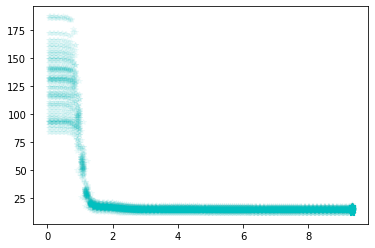

[]


In [6]:
ants = [rdb.ants[i].name for i in range(58)]
ants.remove('m060')
ants.remove('m002')
ants.remove('m004')
ants.remove('m007')
ants.remove('m013')
ants.remove('m020')
ants.remove('m024')
ants.remove('m026')
ants.remove('m041')
ants.remove('m050')
ants.remove('m056')
ants.remove('m058')
rm = []
for index, ant in enumerate(ants):
    if temp[ant].max() > 400:
        rm.append(ant)
        temp.pop(ant)
    
    plot(angle[ant], temp[ant], "*c", alpha=0.05)
    
show()
print(rm)

In [7]:
temp

{'m000': array([ 17.795176,  17.794018,  17.79684 ,  17.799812,  17.814028,
         17.830536,  17.835009,  17.83417 ,  17.82287 ,  17.80701 ,
         17.799343,  17.803745,  17.799532,  17.79707 ,  17.790258,
         17.786747,  17.7838  ,  17.792616,  17.797066,  17.804737,
         17.808746,  17.813068,  17.81567 ,  17.824596,  17.830503,
         17.833887,  17.843018,  17.848896,  17.843653,  17.833542,
         17.82946 ,  17.83518 ,  17.841518,  17.859673,  17.881588,
         17.902899,  17.936798,  17.971792,  18.01488 ,  18.067501,
         18.10279 ,  18.11622 ,  18.095858,  18.07083 ,  18.055262,
         18.060396,  18.069794,  18.075695,  18.07525 ,  18.093378,
         18.098248,  18.119068,  18.208477,  18.34573 ,  18.490467,
         18.78396 ,  19.319824,  19.9511  ,  20.663305,  21.403393,
         21.689978,  21.47057 ,  21.342087,  21.824284,  24.13441 ,
         34.275948,  63.292202, 103.43616 , 127.40541 , 131.0986  ,
        131.85469 , 132.16101 , 132.2406

In [8]:
from operator import itemgetter
ant_len = len(rdb.ants)

ants = [rdb.ants[i].name for i in range(ant_len)]
    #ants = ['m049', 'm050','m058']
ants.remove('m060')
ants.remove('m002')
ants.remove('m024')
ants.remove('m026')
ants.remove('m050')
ants.remove('m058')
def ant_stats(ants, angle, temp):

    ant_temp = []
    ant_angle = []
    ant_std = {}
    ant_mean = {}
    for ant in ants:
        ant_std[ant] = std(temp[ant])
        ant_mean[ant] = mean(temp[ant])
        ant_temp.append(temp[ant])
        ant_angle.append(angle[ant])
    
    
    bin_temp = []
    bin_angle = []
    for i in range(178):
        bin_temp.append(list(map(itemgetter(i), ant_temp)))
        bin_angle.append(list(map(itemgetter(i), ant_angle)))

    mean_temp = []
    std_temp = []
    mean_angle = []
    for ind in range(178):
        m_t = mean(bin_temp[ind])
        s_t = std(bin_temp[ind])
        m_a = mean(bin_angle[ind])
        
        mean_temp.append(m_t)
        std_temp.append(s_t)
        mean_angle.append(m_a)
        
    mean_temp = array(mean_temp)
    std_temp = array(std_temp)
    mean_angle = array(mean_angle)
        
    return mean_temp, std_temp, mean_angle


In [9]:
nbins     = 20
ant_len = len(rdb.ants)

ants = [rdb.ants[i].name for i in range(ant_len)]
    #ants = ['m049', 'm050','m058']
ants.remove('m060')
ants.remove('m002')
ants.remove('m024')
ants.remove('m026')
ants.remove('m050')
ants.remove('m058')

mean_temp, std_temp, mean_angle = ant_stats(ants, angle, temp)

#creating list of zeros using bin as size[x-values, y-values, standard deviation values]
xv       = zeros(nbins)
yv       = zeros(nbins)
sv       = zeros(nbins)

#calculating stats
mean_temp, std_temp, mean_angle = ant_stats(ants, angle, temp)

#creating values representing the x-axis 
bins     = linspace(min(mean_angle),max(mean_angle), nbins)
#print(bins)

#returing the indexes of all the values according to the binning
angle_ind  = digitize(mean_angle, bins) -1
#print(angle_ind)

In [10]:
#extracting all the values for each bin
dat = []
for k in range(nbins):
    xv[k] = mean(mean_angle[angle_ind==k])
    yv[k] = mean(mean_temp[angle_ind==k])
    sv[k] = std(mean_temp[angle_ind==k])

    dat.append([xv[k], yv[k], sv[k]])
dat = array(dat)

In [11]:
print(xv)
print(yv)
print(sv)

[0.2502427  0.75071639 1.25118339 1.75161575 2.25203755 2.75241839
 3.25278123 3.72228732 4.19068426 4.69087078 5.19097675 5.6910409
 6.19101207 6.69089066 7.16035417 7.62814678 8.12776257 8.62723925
 9.29171312 9.35878574]
[155.25613403 136.78703308  33.22172546  18.6962471   17.47210312
  16.55265427  16.34498978  16.3163929   16.33656693  16.26163101
  16.18125916  16.15881348  16.1464653   16.12988281  16.11494827
  16.11022568  16.11806297  16.12928772  16.15270233  16.12581253]
[1.28719598e-01 2.16905785e+01 1.56677275e+01 2.38084272e-01
 3.84392142e-01 1.42450958e-01 5.27052209e-02 5.17250188e-02
 5.73686250e-02 4.23807204e-02 1.23616233e-02 3.13736754e-03
 5.86419646e-03 5.94972447e-03 4.32914030e-03 2.62524048e-03
 6.35516504e-03 1.43705225e-02 1.83509827e-01 0.00000000e+00]


In [19]:
n, _ = histogram(mean_angle, bins=nbins)
sy, _ = histogram(mean_angle, bins=nbins, weights=mean_temp)
sy2, _ = histogram(mean_angle, bins=nbins, weights=mean_temp*mean_temp)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


Q1 quantile :  16.121062755584717
Q2 quantile :  16.163020133972168
Q3 quantile :  16.555496215820312


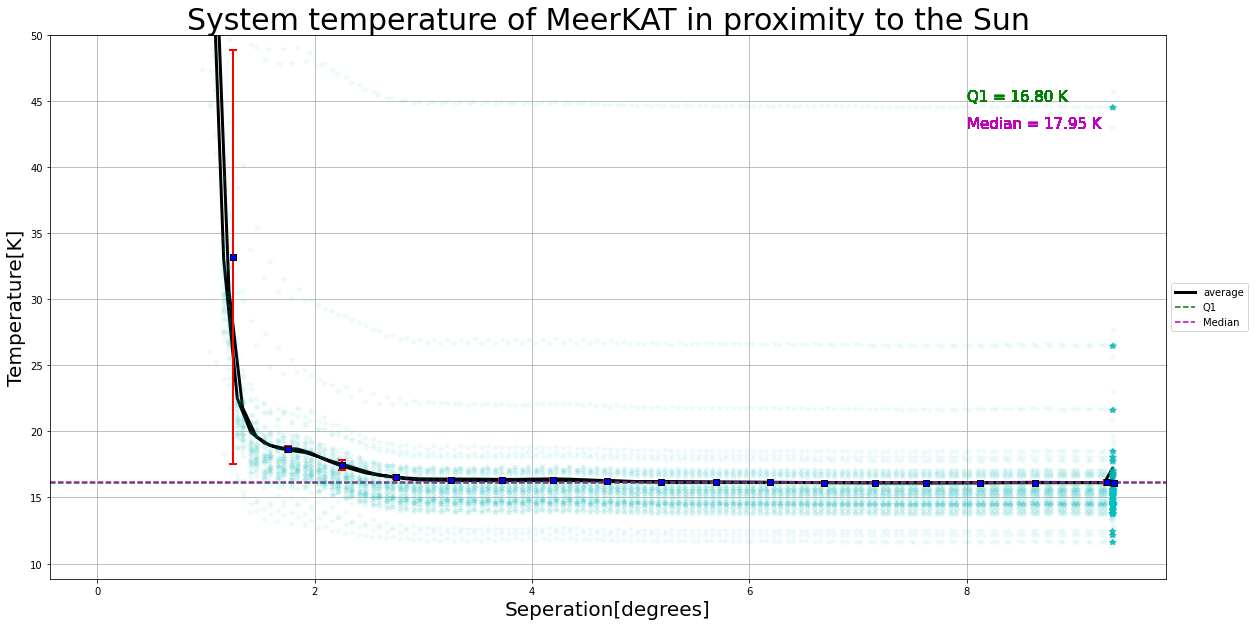

In [13]:
ant_len = len(rdb.ants)

ants = [rdb.ants[i].name for i in range(ant_len)]
    #ants = ['m049', 'm050','m058']
ants.remove('m060')
ants.remove('m002')
ants.remove('m024')
ants.remove('m026')
ants.remove('m050')
ants.remove('m058')

q1 = np.quantile(mean_temp, .25)
print("Q1 quantile : ", q1) 
q2 = np.quantile(mean_temp, .50)
print("Q2 quantile : ", q2 ) 
q3 = np.quantile(mean_temp, .75)
print("Q3 quantile : ", q3)

figure(figsize=(20, 10))
subplots_adjust(hspace=0.5)

median_ = median(mean_temp)
#print("The mean is : ", mean(mean_temp))
pol = 'h'

plot(mean_angle, mean_temp, "-k", label='average', linewidth=3)
errorbar(xv, yv, sv, fmt='ks',lw=2,capsize=4, capthick=2, zorder=3, mfc='b', mec='black',ecolor='r')
axhline(y = q1, color='g', linestyle='--', label="Q1")
axhline(y = q2, color='m', linestyle='--', label="Median")
#axhline(y = q3, color='y', linestyle='--', label="Q3")
for index, ant in enumerate(ants):
    plot(angle[ant], temp[ant], "*c", alpha=0.05)
    text(8, 45, 'Q1 = 16.80 K', fontsize = 15, color = 'g')
    text(8, 43, 'Median = 17.95 K', fontsize = 15, color = 'm')
    #text(8, 41, 'Q3 = 37.17 K', fontsize = 15, color = 'y')
#     fill_between(mean_angle, mean_temp-std_temp, mean_temp+std_temp,
#                  facecolor="orange", # The fill color
#                  color='blue',       # The outline color
#                  alpha=0.2)
    ylim(None, 50)
    #xlim(None, 10)
    title('System temperature of MeerKAT in proximity to the Sun', fontsize=30)
    xlabel('Seperation[degrees]', fontsize=20)
    ylabel('Temperature[K]', fontsize=20)
    legend(loc='center left', bbox_to_anchor=(1, 0.5))
grid()
show()

KeyError: 'm002'

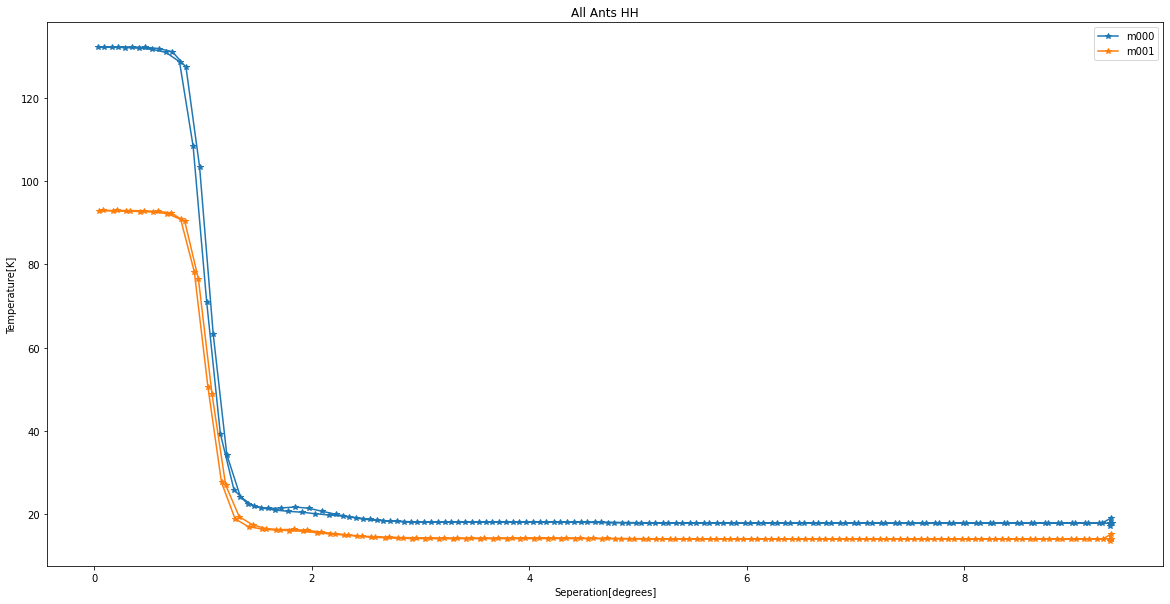

In [16]:
figure(figsize=(20, 10))
#subplots_adjust(hspace=0.5)
ants = rdb.ants
for index, ant in enumerate(ants):
    plot(angle[ant.name], temp[ant.name], "-*", label=ant.name)
    title('All Ants HH')
    xlabel('Seperation[degrees]')
    ylabel('Temperature[K]')
    legend(loc='upper right')
    grid()
show()





In [16]:
angle_sep = np.sqrt(np.sum((np.degrees(dataset.scans[0].target_coords))**2,axis=0))
temp = data_c.scans[0].pol("VV").mean(axis=1)

/scratch2/lkara/venv-py3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1396: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  warnings.warn('kernel_size exceeds volume extent: the volume will be '


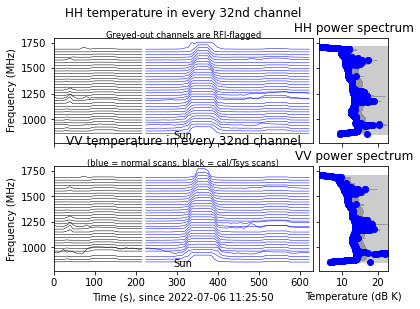

In [17]:
scape.plot_waterfall(dataset);

DEBUG: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f77884c8f28>
DEBUG: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f77884c8f28> on colorbar
DEBUG: Setting pcolormesh


Text(0, 0.5, 'Time (dumps)')

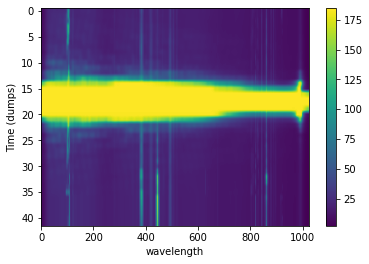

In [18]:
imshow(data_c.scans[0].pol("HH"), aspect='auto')
colorbar()
xlabel("wavelength")
ylabel("Time (dumps)")

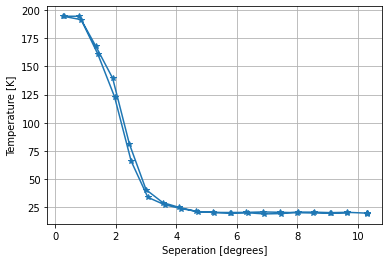

In [20]:
plot(angle_sep, temp, "-*")
xlabel('Seperation [degrees]')
ylabel('Temperature [K]')
grid()